In [1]:
import glob,os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
DIR = "/Users/damoncrockett/genome_2021/data/images/genome_packages_2048/"

In [3]:
allfiles = glob.glob(os.path.join(DIR,"*.jpg"))

In [4]:
df = pd.DataFrame({"localpath":allfiles})

# Removing colorbar

In [5]:
from PIL import Image
import numpy as np
from skimage.color import rgb2hsv

In [6]:
# left upper right lower

In [7]:
def getcropboxes(im):
    w = im.width
    h = im.height
    incr = int(w/50)
    
    cb = []
    for l in range(0,w,incr):
        r = l + incr
        if r > w:
            r = w
        cropbox = (l,0,r,h)
        cb.append(cropbox)
    
    return cb

In [8]:
def getsats(im,cb):
    ls = []
    sats = []
    vals = []
    for c in cb:
        tmp = im.crop(c)
        img = rgb2hsv(np.asarray(tmp))
        ls.append(c[0])
        sats.append(np.var(img[:,:,1]))
        vals.append(np.var(img[:,:,2]))
        
    return pd.DataFrame({"l":ls,"sat":sats,"val":vals})

In [9]:
i = -1

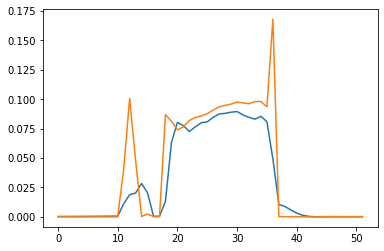

In [10]:
i+=1
im = Image.open(df.localpath.loc[i])
cb = getcropboxes(im)
tmp = getsats(im,cb)
fig,ax = plt.subplots()
ax.plot(tmp.val)
ax.plot(tmp.sat)

In [11]:
def getcrop(sf):
    flags = 0
    for i in sf.index:
        satvar = sf.sat.loc[i]
        valvar = sf.val.loc[i]
        varsum = satvar + valvar
        if varsum > 0.005:
            flags+=1
        else:
            if flags > 0:
                l = sf.l.loc[i+1]
                return l

In [12]:
CROPDIR = "/Users/damoncrockett/genome_2021/data/images/genome_packages_2048_barcrop_wide/"

In [13]:
try:
    os.mkdir(CROPDIR)
except:
    pass

In [14]:
croppaths = []
for i in df.index:
    impath = df.localpath.loc[i]
    im = Image.open(impath)
    cb = getcropboxes(im)
    sf = getsats(im,cb)
    cropl = getcrop(sf)
    imcrop = im.crop((cropl,0,im.width,im.height))
    savestr = CROPDIR + os.path.basename(impath)
    imcrop.save(savestr)
    croppaths.append(savestr)

In [15]:
import sys
sys.path.append("/Users/damoncrockett/ivpy/src/")
from ivpy import *

'requests' module not installed


In [16]:
df['croppath'] = croppaths

In [17]:
attach(df,'croppath')